In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import math

In [2]:
#Below is n is "number of years", and I number them in yr_list
n = 15
yr_list = [i for i in range(1,n+1)]
#print yr_list

In [3]:
A_initial_survival_prob = .95
B_initial_survival_prob = .98
A_yearly_decrease = .02
B_yearly_decrease = .01
Annual_payment_on_each_survival = 5000
discount = .05
v = 1-.05
# print v

# we use the two annuity technique, the expected value of the annuity is: the sum PV of each individual's annuity MINUS 
# the sum PV of the joint-life Annuity
# since the annual_payment is 10000 for both, when they are both alive,
# we find the payment value of the joint-life annuity is 0. So, as for this case,we only have to add up the PV of 
# each individual's annuity

In [4]:
# A defined function is to calculate the survival probability for each year based on the last year
def survival_prob_yearly(num_years,p,p_decrease_rate):
    survivial_prob_each_yr_list = [p*math.pow((1-p_decrease_rate),i) for i in xrange(num_years)]
    return survivial_prob_each_yr_list

In [5]:
data = pd.DataFrame(yr_list, columns=["year"]) 
data

,year
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
#the result after applying the above function
A_Prob_yearly = survival_prob_yearly(n,A_initial_survival_prob,A_yearly_decrease)
B_Prob_yearly = survival_prob_yearly(n,B_initial_survival_prob,B_yearly_decrease)
print A_Prob_yearly
print B_Prob_yearly

[0.95, 0.9309999999999999, 0.9123799999999999, 0.8941323999999998, 0.8762497519999999, 0.8587247569599998, 0.8415502618207998, 0.8247192565843839, 0.8082248714526962, 0.7920603740236423, 0.7762191665431694, 0.760694783212306, 0.7454808875480599, 0.7305712697970986, 0.7159598444011566]
[0.98, 0.9702, 0.960498, 0.95089302, 0.9413840897999999, 0.9319702489019999, 0.9226505464129799, 0.9134240409488501, 0.9042898005393617, 0.895246902533968, 0.8862944335086284, 0.8774314891735421, 0.8686571742818067, 0.8599706025389885, 0.8513708965135987]


In [7]:
# add my Yearly_Survival_Probability to the data frame
data["A's_Yearly_Survival_Probability"] = A_Prob_yearly
data["B's_Yearly_Survival_Probability"] = B_Prob_yearly
data

,year,A's_Yearly_Survival_Probability,B's_Yearly_Survival_Probability
0,1,0.950000,0.980000
1,2,0.931000,0.970200
2,3,0.912380,0.960498
3,4,0.894132,0.950893
4,5,0.876250,0.941384
5,6,0.858725,0.931970
6,7,0.841550,0.922651
7,8,0.824719,0.913424
8,9,0.808225,0.904290
9,10,0.792060,0.895247


In [8]:
#the survival probability of a life till a later year since the current year
# survival probability with the starting year as the baseline
def survival_prob_till_the_year(prob,Annual_payment_on_each_survival,factor):
    j = 1
    p_proc = 1
    survivial_prob_accum = []
    PV_of_future_CF = []
    for item in prob:
        p_proc = item * p_proc
        PV_of_its_CF = p_proc*Annual_payment_on_each_survival*math.pow(factor,j)
        survivial_prob_accum.append(p_proc)
        PV_of_future_CF.append(PV_of_its_CF)
        j +=1
    return survivial_prob_accum, PV_of_future_CF
#Apply the function to our yearly survival probability
A_survival_prob_till_the_year,A_PV_of_its_future_CF = survival_prob_till_the_year(A_Prob_yearly,Annual_payment_on_each_survival,v)
B_survival_prob_till_the_year,B_PV_of_its_future_CF = survival_prob_till_the_year(B_Prob_yearly,Annual_payment_on_each_survival,v)
print A_survival_prob_till_the_year
print B_survival_prob_till_the_year
print A_PV_of_its_future_CF 
print B_PV_of_its_future_CF 

[0.95, 0.8844499999999998, 0.8069544909999997, 0.7215241557286081, 0.6322353625192021, 0.5429161580208192, 0.4568912349291631, 0.3768069996107005, 0.3045447888228346, 0.24121785934196552, 0.18723792573374792, 0.14243091332515523, 0.10617952367991751, 0.07757170944128844, 0.055538229021516596]
[0.98, 0.950796, 0.9132376564079999, 0.8683913130795253, 0.8174897658535957, 0.7618761405574132, 0.7029454373843096, 0.642087261982133, 0.5806329620666879, 0.5198098607993252, 0.4607045861093369, 0.40423671105899583, 0.3511431191694785, 0.30197275976959626, 0.2570908192077267]
[4512.5, 3991.0806249999987, 3459.3130336056233, 2938.4296718346227, 2446.0583576538024, 1995.4663252519256, 1595.32094804683, 1249.9073109723424, 959.6958669514862, 722.1302139602109, 532.5047471750436, 384.81990405125146, 272.53208943737184, 189.14890890868134, 128.65187222136262]
[4655.0, 4290.466949999999, 3914.9356783140443, 3536.5507597449005, 3162.789987094253, 2800.2448629221344, 2454.465080221985, 2129.869041346999,

In [9]:
#Use Series to sum up our PV of its expected future CF 
PV_of_the_whole_future_CF_yearly = Series(A_PV_of_its_future_CF)+ Series(B_PV_of_its_future_CF)
print PV_of_the_whole_future_CF_yearly

0     9167.500000
1     8281.547575
2     7374.248712
3     6474.980432
4     5608.848345
5     4795.711188
6     4049.786028
7     3379.776352
8     2789.413775
9     2278.277039
10    1842.748803
11    1476.986827
12    1173.814791
13     925.471705
14     724.191482
dtype: float64


In [10]:
#add the column to our data frame
data['PV(future CF)']= PV_of_the_whole_future_CF_yearly 
data

,year,A's_Yearly_Survival_Probability,B's_Yearly_Survival_Probability,PV(future CF)
0,1,0.950000,0.980000,9167.500000
1,2,0.931000,0.970200,8281.547575
2,3,0.912380,0.960498,7374.248712
3,4,0.894132,0.950893,6474.980432
4,5,0.876250,0.941384,5608.848345
5,6,0.858725,0.931970,4795.711188
6,7,0.841550,0.922651,4049.786028
7,8,0.824719,0.913424,3379.776352
8,9,0.808225,0.904290,2789.413775
9,10,0.792060,0.895247,2278.277039


In [15]:
# Here is our final result:

print "PV of the annuity:", round(sum(PV_of_the_whole_future_CF_yearly),2)

PV of the annuity: 60343.3


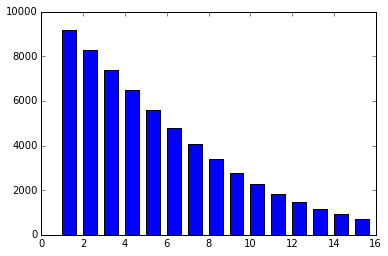

In [12]:
#Use matplotlib to visualize our PV(future CF)
import matplotlib.pyplot as plt
%matplotlib inline
width = 1/1.5
plt.bar(yr_list, PV_of_the_whole_future_CF_yearly, width, color="blue")

fig = plt.figure()